# USA COVID-19 Vaccinations | Data Science

__Description : State-by-state data on COVID-19 vaccinations in the United States using different machine learning algorithms and estimation of best one with best parameters.__   --   Aniket Sinha

__Python libraries used :__
    1. Pandas
    2. Scikit-learn
    3. Seaborn
    4. Matplotlib

Import pandas and create a DataFrame _df_ to read US State Vaccinations dataset. This dataset is downloaded from Kaggle.

In [2]:
import pandas as pd
df = pd.read_csv('us_state_vaccinations.csv')
df.head()

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN


In [6]:
df.shape

(9773, 14)

In [7]:
df.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used'],
      dtype='object')

In [8]:
df.groupby('total_vaccinations')['total_vaccinations'].agg('count')

total_vaccinations
416.0          1
424.0          1
565.0          1
605.0          1
639.0          1
              ..
301638578.0    1
302851917.0    1
303923667.0    1
304753476.0    1
305687618.0    1
Name: total_vaccinations, Length: 9053, dtype: int64

## Data Analysis and Cleaning

DataFrame consists of information which do not contribute in the prediction of Vaccinations at all like - 
people_fully_vaccinated_per_hundred, total_vaccinations_per_hundred etc.

Creating DataFrame _df2_ after filtering unwanted information.


In [12]:
df2 = df[['date', 'location', 'total_vaccinations', 'people_vaccinated']]
df2.head()

,date,location,total_vaccinations,people_vaccinated
0,2021-01-12,Alabama,78134.0,70861.0
1,2021-01-13,Alabama,84040.0,74792.0
2,2021-01-14,Alabama,92300.0,80480.0
3,2021-01-15,Alabama,100567.0,86956.0
4,2021-01-16,Alabama,NaN,NaN


Couple of things to be taken care of :
    1. Dealing with NULL values
    2. Dealing with exceptional entries
    3. Taking care of Unformatted entries
    4. Create dummy values for locations

### 1. Dealing with NULL values

We will check how many values are NULL in each column.

In [13]:
df2.isna().sum()

date                    0
location                0
total_vaccinations    335
people_vaccinated     502
dtype: int64

In [14]:
df2.shape

(9773, 4)

We can see that column = _'total_vaccinations'_ has 335 and column _'people_vaccinated'_ has 502 NULL values. We have total 837 NULL values in our updated dataframe. 


df2 has 9773 rows, so droping these NULL rows will make no difference in our training.

In [15]:
df3 = df2.dropna()

In [16]:
df3.shape

(9271, 4)

In [17]:
df3.head()

,date,location,total_vaccinations,people_vaccinated
0,2021-01-12,Alabama,78134.0,70861.0
1,2021-01-13,Alabama,84040.0,74792.0
2,2021-01-14,Alabama,92300.0,80480.0
3,2021-01-15,Alabama,100567.0,86956.0
7,2021-01-19,Alabama,130795.0,114319.0


In [18]:
df3.isnull().sum()

date                  0
location              0
total_vaccinations    0
people_vaccinated     0
dtype: int64

Dataset does not have any other NULL entries.

In [20]:
df3['date'].unique()

array(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
       '2021-01-23', '2021-01-24', '2021-01-25', '2021-01-26',
       '2021-01-27', '2021-01-28', '2021-01-29', '2021-01-30',
       '2021-01-31', '2021-02-01', '2021-02-02', '2021-02-03',
       '2021-02-04', '2021-02-05', '2021-02-06', '2021-02-07',
       '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-11',
       '2021-02-12', '2021-02-13', '2021-02-14', '2021-02-16',
       '2021-02-17', '2021-02-18', '2021-02-19', '2021-02-20',
       '2021-02-21', '2021-02-22', '2021-02-23', '2021-02-24',
       '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28',
       '2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
       '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
       '2021-03-09', '2021-03-10', '2021-03-11', '2021-03-12',
       '2021-03-13', '2021-03-14', '2021-03-15', '2021-03-16',
       '2021-03-17', '2021-03-18', '2021-03-19', '2021-

In [26]:
df3['location'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

It seems that other columns have proper entries. Let us check if they are of type _integer_ , _float_ or something else. 

In [28]:
df4 = df3.copy()
len(df4.location.unique())

65

In [30]:
df4.location.apply(lambda x : x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats[:60]

location
Wyoming                           145
Idaho                             145
Minnesota                         145
Michigan                          145
Massachusetts                     145
Maryland                          145
Marshall Islands                  145
Maine                             145
Louisiana                         145
Kentucky                          145
Kansas                            145
Iowa                              145
Indiana                           145
Indian Health Svc                 145
Illinois                          145
Guam                              145
Missouri                          145
Georgia                           145
Florida                           145
Federated States of Micronesia    145
Dept of Defense                   145
Delaware                          145
Connecticut                       145
Colorado                          145
California                        145
Bureau of Prisons                 145
Ark

In [31]:
len(location_stats[location_stats <= 10])

1

In [32]:
location_stats_less_than_10 = location_stats[location_stats <=10]
location_stats_less_than_10

location
Long Term Care    3
Name: location, dtype: int64

In [33]:
df4.shape

(9271, 4)

### Visulaizing Features

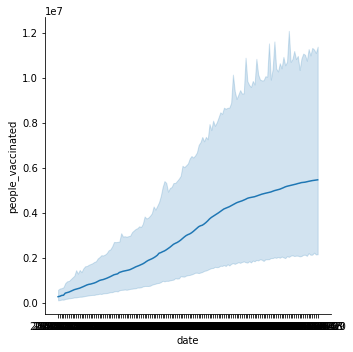

In [66]:
import seaborn as sns

sns.relplot(x="date", y="people_vaccinated", data = df4, kind = 'line')

In [34]:
df4.columns

Index(['date', 'location', 'total_vaccinations', 'people_vaccinated'], dtype='object')

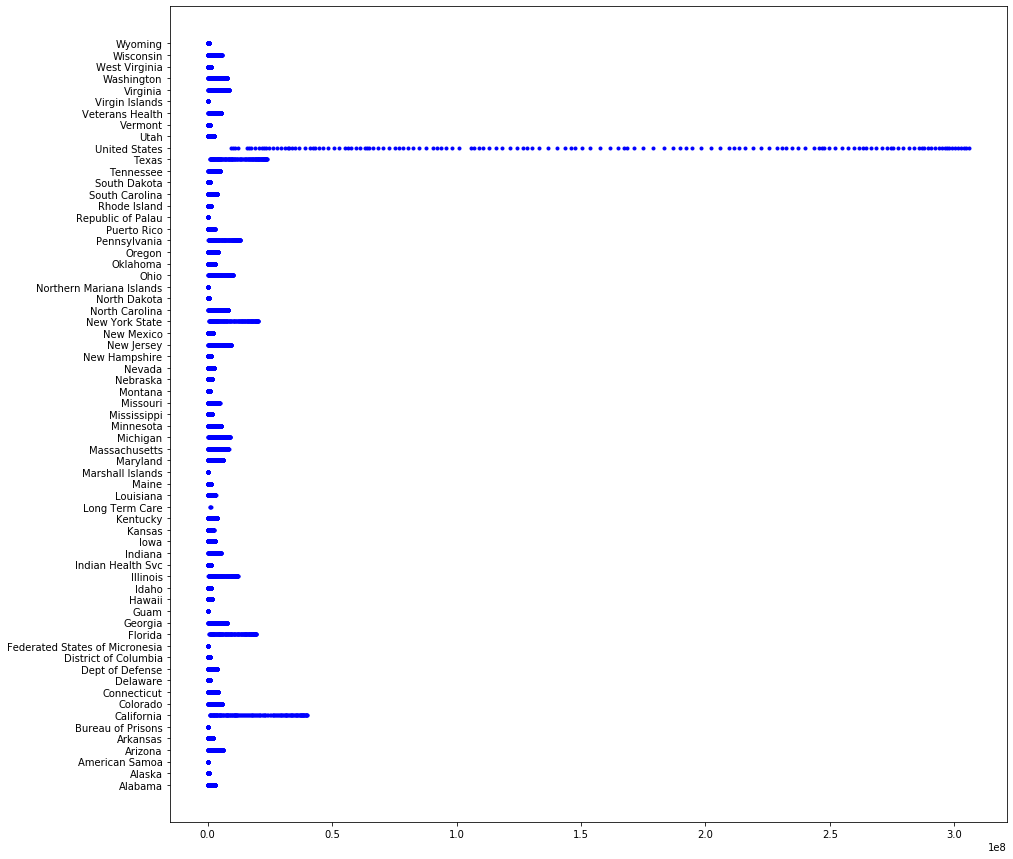

In [40]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 15)
plt.scatter(df4.total_vaccinations, df4.location, marker = '.', color = 'blue', label = 'total vaccinations')

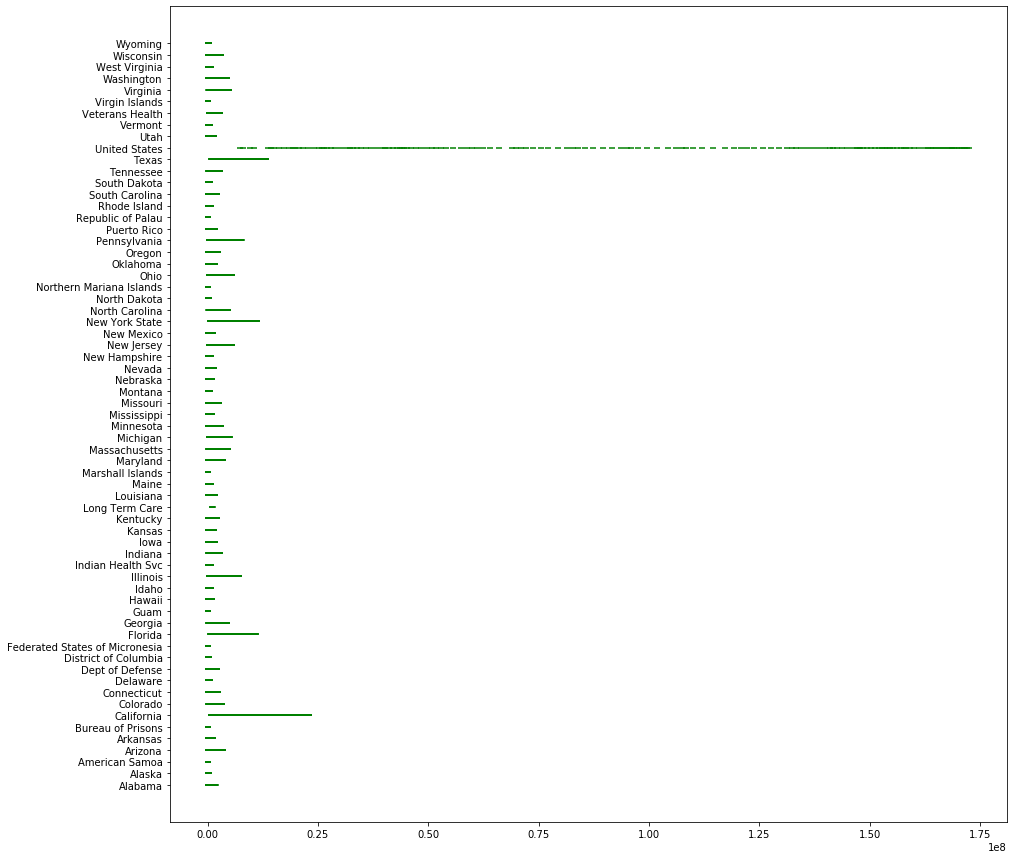

In [48]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.scatter(df4.people_vaccinated, df4.location, marker = '_', color = 'green', label = 'total vaccinations')

__Data is almost clean. Let us visulaize histogram of _price_per_sqft_ to get the maximum and minimum cout of prices.__

Text(0, 0.5, 'total_vaccinated')

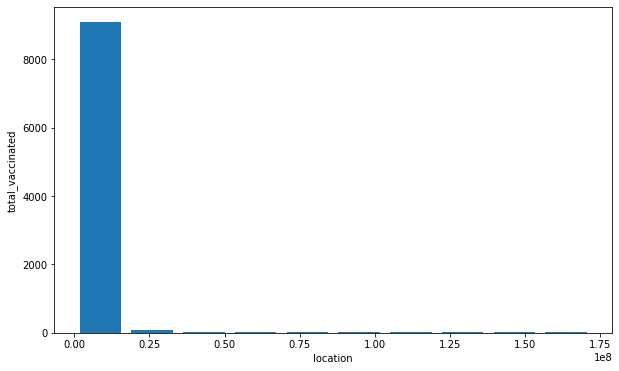

In [50]:
# Plotting histogram of price_per_sqft
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(df4.people_vaccinated, rwidth = 0.8)
plt.xlabel('location')
plt.ylabel('total_vaccinated')

In [54]:
df4.head()

,date,location,total_vaccinations,people_vaccinated
0,2021-01-12,Alabama,78134.0,70861.0
1,2021-01-13,Alabama,84040.0,74792.0
2,2021-01-14,Alabama,92300.0,80480.0
3,2021-01-15,Alabama,100567.0,86956.0
7,2021-01-19,Alabama,130795.0,114319.0


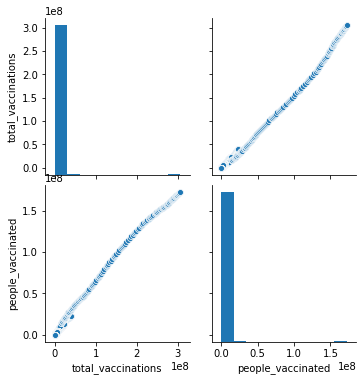

In [67]:
sns.pairplot(df4)

In [53]:
df4.shape

(9271, 4)

__Data is very clean now and is ready for training.__

Machine Learning Models work only with numbers. Converting values in __Location__ column to digits by creating dummy values for them.

In [55]:
dummies = pd.get_dummies(df4.location)
dummies.head()

,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,California,Colorado,Connecticut,Delaware,...,United States,Utah,Vermont,Veterans Health,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dummy values created for location column with 1 corresponding to respective location and other entries as 0.

Creating DataFrame _df5_ by adding _dummies values_.

In [57]:
df5 = pd.concat([df4, dummies], axis = 'columns')
df5.head()

,date,location,total_vaccinations,people_vaccinated,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,...,United States,Utah,Vermont,Veterans Health,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2021-01-12,Alabama,78134.0,70861.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-13,Alabama,84040.0,74792.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-14,Alabama,92300.0,80480.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-15,Alabama,100567.0,86956.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2021-01-19,Alabama,130795.0,114319.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Data is completely clean and is ready for training.__

## Training the Model

__Preparing train and test data with X as features and Y as labels.__

In [59]:
X = df5.drop(['location', 'date'], axis = 'columns')
X.head()

,total_vaccinations,people_vaccinated,Alabama,Alaska,American Samoa,Arizona,Arkansas,Bureau of Prisons,California,Colorado,...,United States,Utah,Vermont,Veterans Health,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,78134.0,70861.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,84040.0,74792.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92300.0,80480.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100567.0,86956.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,130795.0,114319.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
Y = df5.date
Y.head()

0    2021-01-12
1    2021-01-13
2    2021-01-14
3    2021-01-15
7    2021-01-19
Name: date, dtype: object

Spliting the features and labels into 80% training and 20% test data

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [62]:
# Function to predict score
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [90]:
from sklearn.model_selection import GridSearchCV

# Function to find out the best algorithm with best parameters using GridSearchCV.
def find_best_model(X, Y):
    algorithm = {
        'Linear Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        
        'Lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1, 2],
                'selection' : ['random', 'cyclic']
            }
        },
        
        'Decision Tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size= 0.2, random_state= 0)
    for key, values in algorithm.items():
        gs = GridSearchCV(values['model'], values['params'], cv = cv, return_train_score = False)
        gs.fit(X, Y)
        scores.append({
            'model' : key,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

## Results

In [91]:
find_best_model(X, Y)

,model,best_score,best_params
0,Linear Regression,0.845409,{'normalize': True}
1,Lasso,0.719253,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision Tree,0.753200,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


It turned out that model - __Linear Regression__ has the best score with parameter - __normalize : True__